In [278]:
import calendar
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import scipy as sp
import pickle
import pandas as pd

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [279]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
x_mesh, y_mesh = np.meshgrid(x, y, sparse=True)
#print(np.array(mesh).shape())
print(np.array(x_mesh)[:5,:5])

[[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384]]


In [280]:
def f(x):
    return ( 4 - (2.1*(x[0]**2)) + ((x[0]**4)/3))*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2


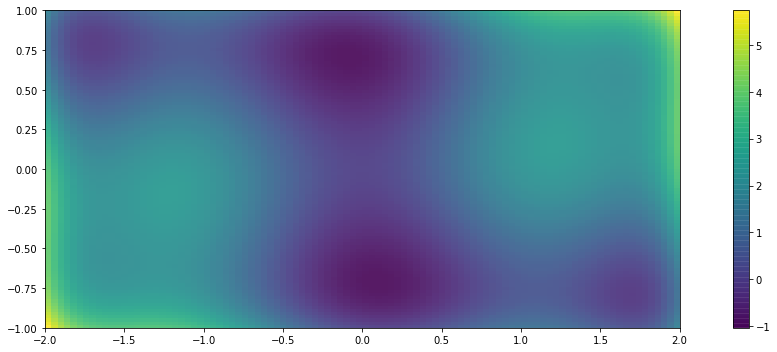

In [281]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(15, 5))
im = ax.imshow(f([x_mesh, y_mesh]), extent=[-2, 2, -1, 1], alpha=0.9, cmap=plt.cm.viridis, origin='lower')
fig.colorbar(im, ax=ax)
fig.tight_layout()


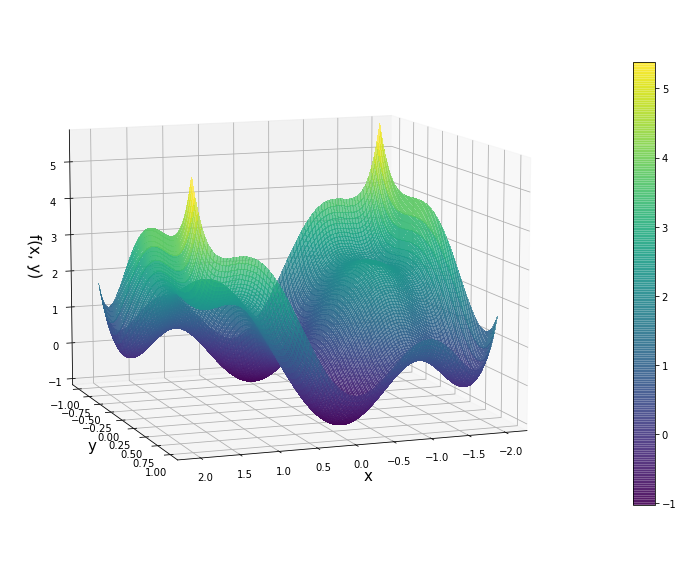

In [282]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')
d3_plot = ax.plot_surface(x_mesh, y_mesh, f([x_mesh, y_mesh]), rstride=1, cstride=1,
                       cmap=plt.cm.viridis, linewidth=0, antialiased=False, alpha=0.7)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('f(x, y)', fontsize=15)
ax.view_init(10, 70)
fig.colorbar(d3_plot, shrink=0.8)
fig.tight_layout()

In [283]:
points_powell = [[0,-0.75], [0,0.75], [0,0]]
points_cg = [[-1.6,0.5], [1.75,-0.80], [0,0]]

In [284]:
for i in points_powell:
    solution=sp.optimize.minimize(f,x0=i ,method='Powell')
    print(f'\n Solution with initial point {i}, and method Powell:\n')
    print(f' Did it coverge?:', solution['success'] )
    print('\n Point found: ', solution['x'])

    


 Solution with initial point [0, -0.75], and method Powell:

 Did it coverge?: True

 Point found:  [ 0.08987277 -0.71265816]

 Solution with initial point [0, 0.75], and method Powell:

 Did it coverge?: True

 Point found:  [-0.08986384  0.71265729]

 Solution with initial point [0, 0], and method Powell:

 Did it coverge?: True

 Point found:  [-0.08984201  0.71265634]


In [285]:
for i in points_cg:
    solution=sp.optimize.minimize(f,x0=i ,method='CG')
    print(f'\n Solution with initial point {i}, and method Newton CG:\n')
    print(f' Did it coverge?:', solution['success'] )
    print('\n Point found: ', solution['x'])


 Solution with initial point [-1.6, 0.5], and method Newton CG:

 Did it coverge?: True

 Point found:  [-1.70360669  0.79608353]

 Solution with initial point [1.75, -0.8], and method Newton CG:

 Did it coverge?: True

 Point found:  [ 1.70360656 -0.79608357]

 Solution with initial point [0, 0], and method Newton CG:

 Did it coverge?: True

 Point found:  [0. 0.]


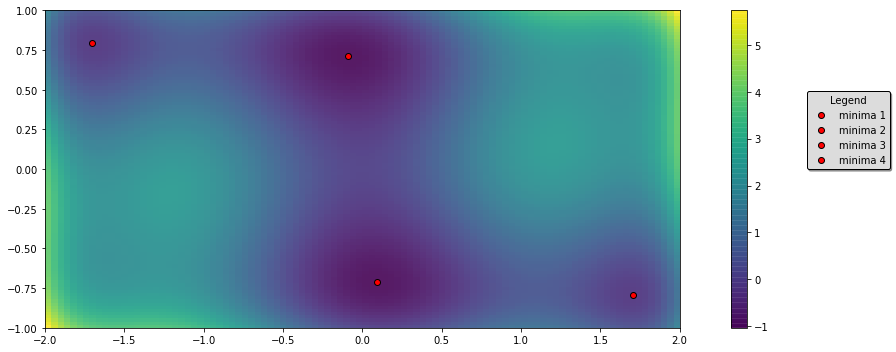

In [286]:
# Plotting the minima found
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(15, 5))
im = ax.imshow(f([x_mesh, y_mesh]), extent=[-2, 2, -1, 1], alpha=0.9, cmap=plt.cm.viridis, origin='lower')
fig.colorbar(im, ax=ax)
for i in range(len(points_powell[:-1])):
    solution=sp.optimize.minimize(f,x0=points_powell[i] ,method='Powell')
    ax.scatter(solution['x'][0],solution['x'][1], color='red', edgecolor='black', label=f'minima {i+1}')
for i in range(len(points_cg[:-1])):
    solution=sp.optimize.minimize(f,x0=points_cg[i] ,method='CG')
    ax.scatter(solution['x'][0],solution['x'][1], color='red', edgecolor='black', label=f'minima {3+i}')
#ax.scatter(solution5['x'][0],solution5['x'][1], color='red', label='absolute minima 1')
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', title='Legend', loc=[1.2, 0.5])
fig.tight_layout()

We can see from the values of the four minima that the function has 2 absoloute minima (minima1 and minima 2) that have the same f(x, y) value and 2 local minima (minima 3 and minima 4), also the two local minima have the same value of f.

We see that the result with initial point (0,0) depends on the method chosen: with Newton we are not able to reach one of the absolute minima. Using Powell's method we instead reach one of the two absolute minima.

In [287]:
colors=['black', 'red', 'blue', 'green']

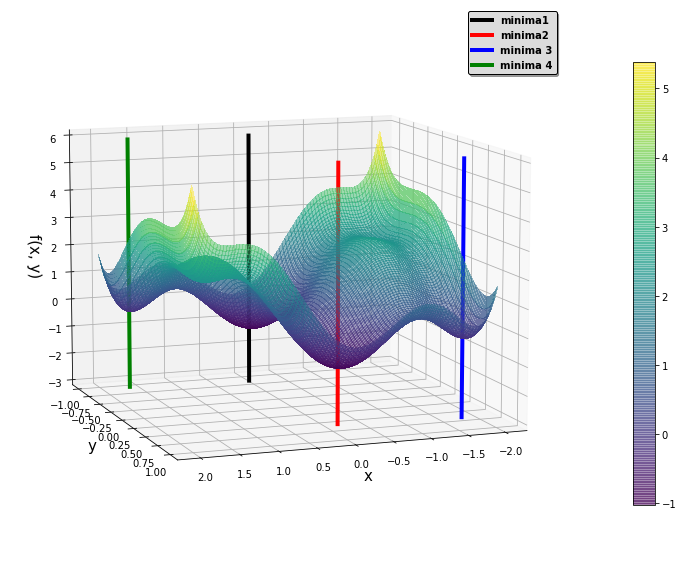

In [288]:
# Here we show with a 3d plot the locations of the minima
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')
d3_plot = ax.plot_surface(x_mesh, y_mesh, f([x_mesh, y_mesh]), rstride=1, cstride=1,
                       cmap=plt.cm.viridis, linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('f(x, y)', fontsize=15)
ax.view_init(10, 70)
for i in range(len(points_powell[:-1])):
    solution=sp.optimize.minimize(f,x0=points_powell[i] ,method='Powell')
    x_s = [solution['x'][0],solution['x'][0]]
    y_s = [solution['x'][1], solution['x'][1]]
    z_s = [-3,6]
    ax.plot(x_s, y_s, z_s, linewidth=4, color=colors[i], label=f'minima{i+1}')
for i in range(len(points_cg[:-1])):
    solution=sp.optimize.minimize(f,x0=points_cg[i] ,method='CG')
    x_s = [solution['x'][0],solution['x'][0]]
    y_s = [solution['x'][1], solution['x'][1]]
    z_s = [-3,6]
    ax.plot(x_s, y_s, z_s, linewidth=4, color=colors[2+i], label=f'minima {3+i}')
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':10})
fig.colorbar(d3_plot, shrink=0.8)
fig.tight_layout()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [289]:
max_temp=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
#calendar.month_name[1:]

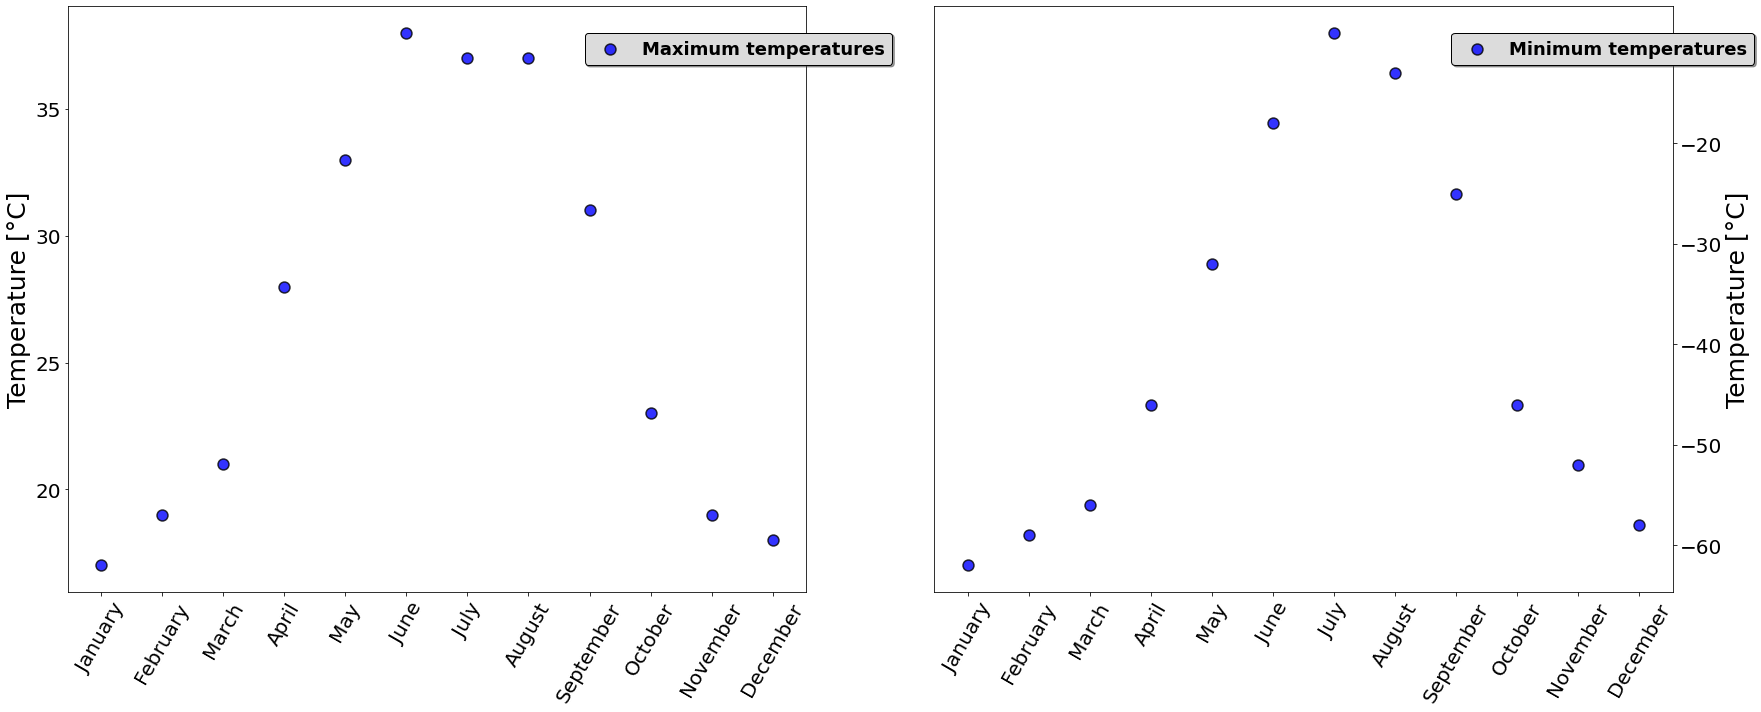

In [290]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(25, 10))
ax[0].scatter(calendar.month_name[1:], max_temp, label='Maximum temperatures',  color='blue',  edgecolor='black',linewidth=1.5, s=120, alpha=0.8)
ax[0].set_ylabel('Temperature [°C]', fontsize=25)
ax[0].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18}, loc=[0.7,0.9])


ax[1].scatter(calendar.month_name[1:], min_temp, label='Minimum temperatures',  color='blue',  edgecolor='black',linewidth=1.5, s=120, alpha=0.8)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Temperature [°C]', fontsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18}, loc=[0.7,0.9])
fig.tight_layout()

In [291]:
x_data=(np.arange(0,12))
x_axis=np.linspace(0, 11, 100)

In [292]:
# Defining the sine and gaussian functions for the plots
def f_sin(t, amplitude, omega, phi, offset):
    return amplitude * np.sin(omega * (t - phi)) + offset

In [293]:
popt_max, pcov_max = sp.optimize.curve_fit(f_sin, x_data, max_temp, p0=[6, np.pi/12, 0, 17])
popt_min, pcov_min = sp.optimize.curve_fit(f_sin, x_data, min_temp, p0=[6, np.pi/12, 1, -60])

In [294]:
def f_gauss(x, A, mu, offset, sigma):
    return A*np.exp(-(1/2)*(((x-mu)/sigma)**2)) + offset

#print(popt)
#print(pcov)

In [295]:
popt_gauss_min, pcov_gauss_min = sp.optimize.curve_fit(f_gauss, x_data, min_temp, p0=[50, 7, -60, 3])
popt_gauss_max, pcov_gauss_max = sp.optimize.curve_fit(f_gauss, x_data, max_temp, p0=[37, 7, 18, 3])

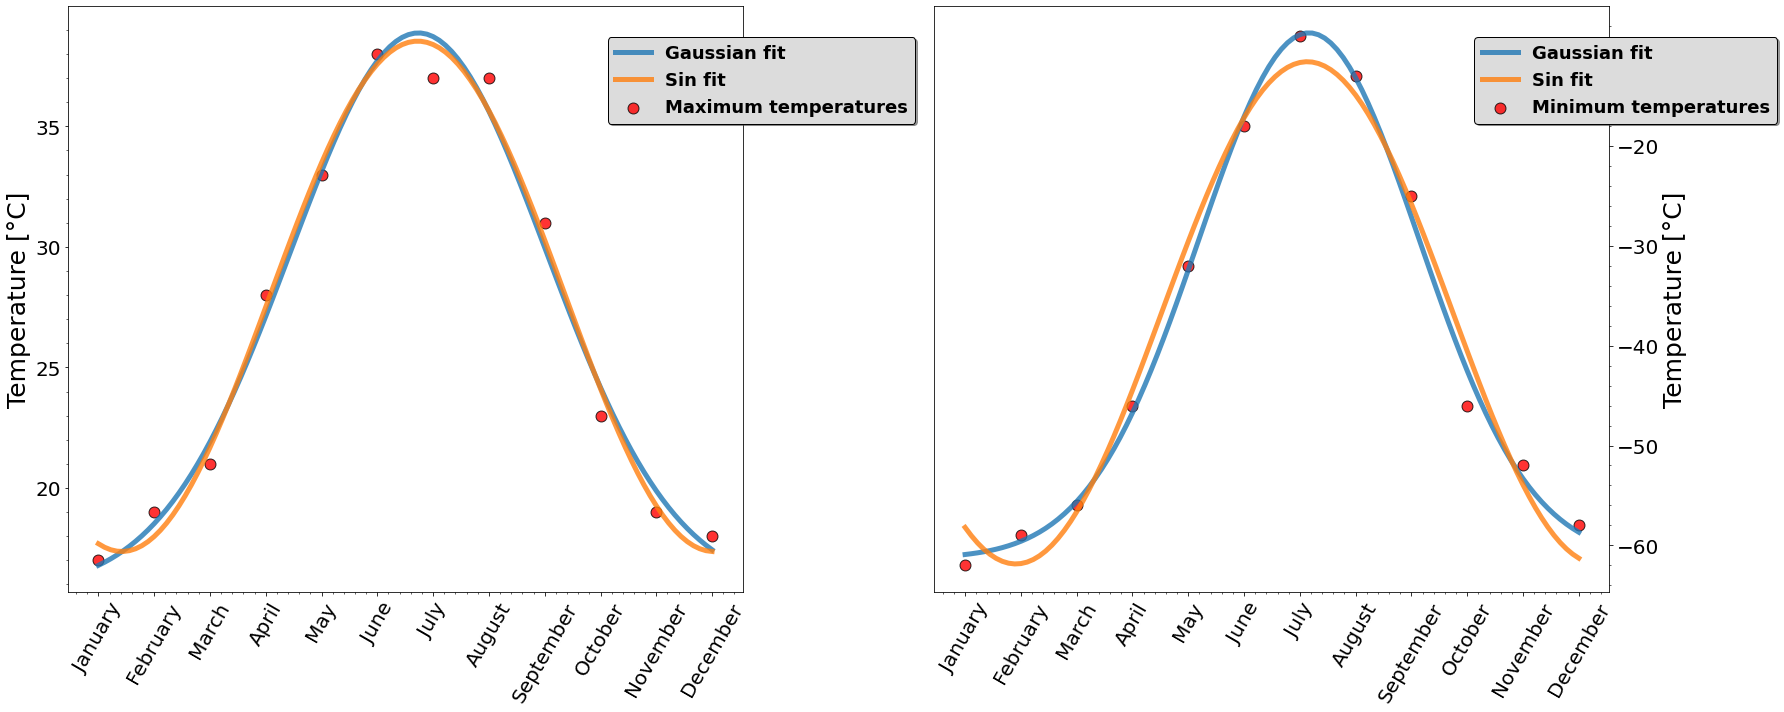

In [296]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(25, 10))
ax[0].scatter(calendar.month_name[1:], max_temp, label='Maximum temperatures', edgecolor='black', alpha=0.8, color='red', s=120)
ax[0].plot(x_axis, f_gauss((x_axis), *popt_gauss_max), linewidth=5, alpha=0.8, label='Gaussian fit')
ax[0].plot(x_axis, f_sin(x_axis, *popt_max), linewidth=5, alpha=0.8, label='Sin fit')
ax[0].set_ylabel('Temperature [°C]', fontsize=25)
ax[0].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18},loc=[0.8,0.8])
ax[0].minorticks_on()


ax[1].scatter(calendar.month_name[1:], min_temp, label='Minimum temperatures',  edgecolor='black', alpha=0.8, color='red', s=120)
ax[1].plot(x_axis,f_gauss(x_axis, *popt_gauss_min), label='Gaussian fit', linewidth=5, alpha=0.8)
ax[1].plot(x_axis,f_sin(x_axis, *popt_min), label='Sin fit', linewidth=5, alpha=0.8)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Temperature [°C]', fontsize=25)
ax[1].tick_params(axis='x', which='major', labelsize=20, rotation=60)
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].minorticks_on()
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':18}, loc=[0.8,0.8])
fig.tight_layout()




In [297]:
# Gauss max r
residuals = max_temp- f_gauss(x_data, *popt_gauss_max)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((max_temp-np.mean(max_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print('The R coefficient, for the gaussian plot of the maximum temperatures is:\n', r)

The R coefficient, for the gaussian plot of the maximum temperatures is:
 0.99291470320281


In [298]:
# Gauss min r
residuals = min_temp- f_gauss(x_data, *popt_gauss_min)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((min_temp-np.mean(min_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print('The R coefficient, for the gaussian plot of the minimum temperatures is:\n', r)

The R coefficient, for the gaussian plot of the minimum temperatures is:
 0.9972984476272483


In [299]:
# Sine max r
residuals = max_temp- f_sin(x_data, *popt_max)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((max_temp-np.mean(max_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print('The R coefficient, for the sin plot of the minimum temperatures is:\n', r)

The R coefficient, for the sin plot of the minimum temperatures is:
 0.9941077622912879


In [300]:
# Sine min r
residuals = min_temp- f_sin(x_data, *popt_min)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((min_temp-np.mean(min_temp))**2)
r_squared = 1 - (ss_res / ss_tot)
r = np.sqrt(r_squared)
print('The R coefficient, for the gaussian plot of the minimum temperatures is:\n', r)

The R coefficient, for the gaussian plot of the minimum temperatures is:
 0.9893029235548497


We can say that we choose the gaussian modell over the sinus one given the very close R coefficient on the max temperatures and a better R coefficient for the gaussian plot on the min temperatures. Not knowing the errors on the the temperature we diddn't perform the $\chi^2$ test.

In [301]:
#Compatibility of the time offset for the gaussians plots
comp_gaus = abs((popt_gauss_max[1]-popt_gauss_min[1]))/(np.sqrt(pcov_gauss_max[1, 1]+pcov_gauss_min[1, 1]))
print('Compatibility: ', comp_gaus)

Compatibility:  4.638122132895186


For the gaussian plot the time shift is not compatible.

$\lambda < 1$, execllent compatibility

$1\leq\lambda < 2$, good compatibility)

$2\leq\lambda < 3$, reasonable compatibility

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [302]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /Users/tommaso/Desktop/MagistraleI/Python/LaboratoryOfComputationalPhysics_Y4/lab_data/
    
    

In [303]:
# Importing the data
file = pd.read_pickle(r'lab_data/residuals_261.pkl')
df=pd.DataFrame.from_dict(file.item())
df.head()
print(df['residuals'].shape)

(11131,)


In [304]:
print(np.sqrt(11131))

105.5035544424926


In [305]:
def gaussian(x, A , mu , std ):
    return A * np.exp( - ((x - mu) **2 /(2*std**2)))

def lorentzian(x, A, x0, gamma):
    return A*gamma**2/(gamma**2+(x-x0)**2)

def voigt(x, amplG, mu, std, amplL, x0, gamma):
    return gaussian(x, amplG, mu, std)+lorentzian(x, amplL, x0, gamma)

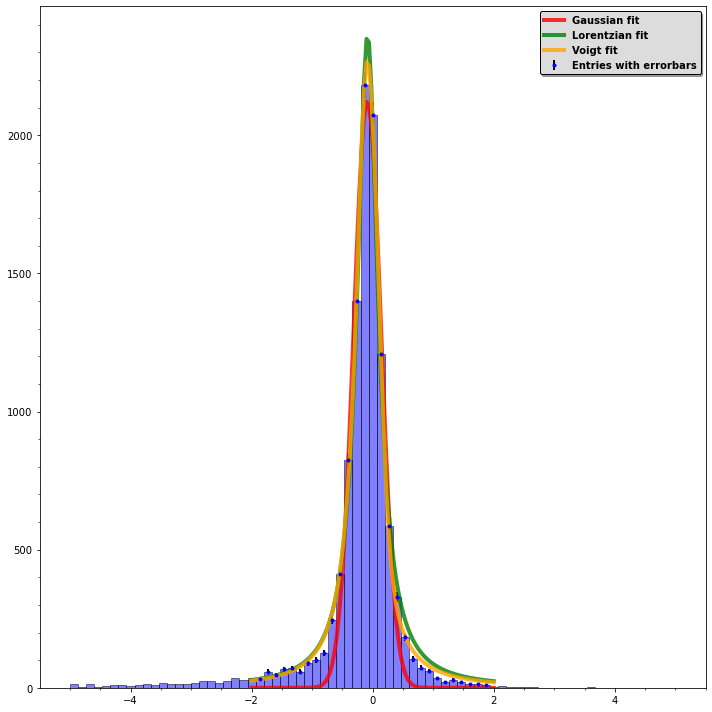

In [330]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(10, 10))
entries, edges , _ = ax.hist(df['residuals'], bins=75 , range=(-5,5) , alpha=0.5 , color='blue', edgecolor='black')
x_data = 0.5 * (edges[:-1] + edges[1:])
errors = np.sqrt(entries) 
ind = np.array([ p for p in range (len(x_data)) if ( -2< x_data[p] <2)])

x_data = x_data[ind]
entries = entries[ind]
errors = errors[ind]
#choose a curve to fit




popt_gauss , pcov_gauss  = sp.optimize.curve_fit(gaussian, x_data, entries, p0=[1000, 0, 1])

popt_lor, pcov_lor = sp.optimize.curve_fit(lorentzian, x_data, entries , p0=[1000, 0, 1])

popt_voigt, pcov_voigt = sp.optimize.curve_fit(voigt, x_data, entries, p0=[1000, 0, 1, 60, 0, 1])


x = np.linspace(-2, 2, 100)

ax.plot(x, gaussian(x, *popt_gauss), color='red', linewidth=4, label='Gaussian fit', alpha=0.8)
ax.plot(x, lorentzian(x, *popt_lor), color='green', linewidth=4, label='Lorentzian fit', alpha=0.8)
ax.plot(x, voigt(x, *popt_voigt), color='orange', linewidth=4, label='Voigt fit', alpha=0.8)
ax.errorbar(x_data, entries, errors, fmt='b.', c='black', ecolor='black', label='Entries with errorbars', elinewidth=2)
ax.minorticks_on()

ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':10})
fig.tight_layout()


chi2 with function Gaussian = 1269.1535873362736 

p-value with function Gaussian = 0.0 

chi2 with function Lorentzian = 504.44653468278545 

p-value with function Lorentzian = 0.0 

chi2 with function Voigt = 233.69560047510103 

p-value with function Voigt = 0.0 



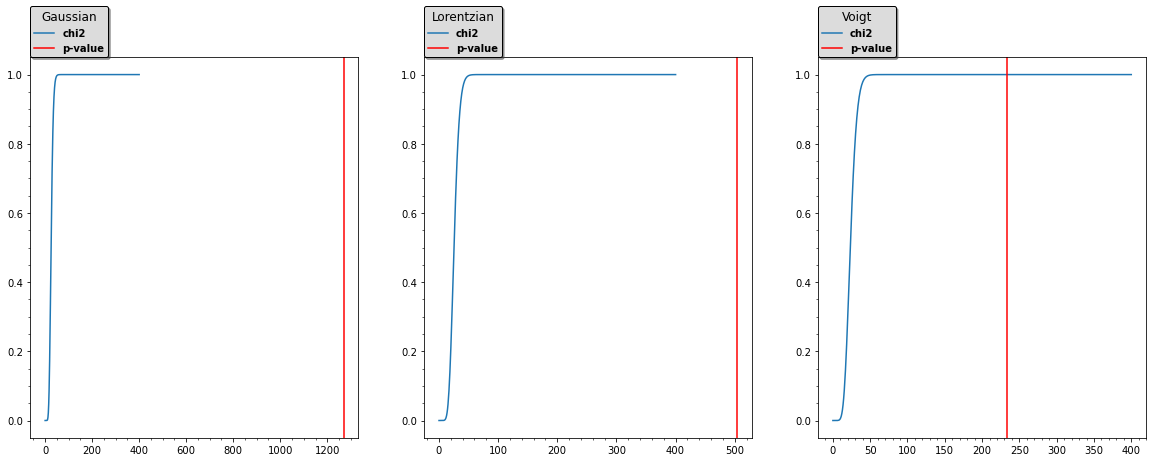

In [342]:
fig, ax = plt.subplots(nrows= 1, ncols=3, figsize=(20, 7))
x_axis = np.linspace(0, 400, 500)
dof = [len(x_pos) - 3, len(x_pos) - 3, len(x_pos) - 5]
function = [gaussian, lorentzian, voigt]
func_name = ['Gaussian', 'Lorentzian', 'Voigt']
p0 = [[1000, 0, 1], [1000, 0, 1], [1000, 0, 1, 60, 0, 1]]
i = 0
for dof, function, p0, func_name in zip(dof, functions, p0, func_name):
    popt, pcov = sp.optimize.curve_fit(function, x_data, entries, p0=p0)
    chi2 = np.sum( ((entries - function(x_pos , *popt))**2) / errors**2 )
    ax[i].plot(x_axis, sp.stats.chi2.cdf(x_axis, df=dof), label='chi2')
    ax[i].axvline(chi2, color='red', label='p-value')
    ax[i].minorticks_on()
    ax[i].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':10}, loc=[0,1], title=f'{func_name}', title_fontsize='large')
    i += 1
    pval = 1. - sp.stats.chi2.cdf(chi2, ndof)
    print(f'chi2 with function {func_name} =', chi2, '\n')
    print(f'p-value with function {func_name} =', pval, '\n')

n Degrees of Freedom = 26
chi2 = 233.69560047510103
p-value = 0.0


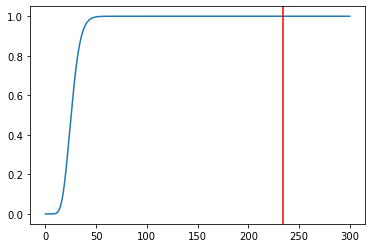

In [314]:
#Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

ndof = len(x_pos) - 3
print("n Degrees of Freedom =", ndof)

# calculate the chi^2
chi2 = np.sum( ((entries - voigt(x_pos , *popt_voigt))**2) / errors**2 )
print("chi2 =", chi2)


# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - sp.stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory


x = np.linspace(0,300,1000)

plt.plot(x, sp.stats.chi2.cdf(x, df=ndof))
plt.fill_between(x_pos, counts, where=(x_pos > chi2), color='lightblue')
plt.axvline(chi2, color='r')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [308]:
#! wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P /Users/tommaso/Desktop/MagistraleI/Python/LaboratoryOfComputationalPhysics_Y4/lab_data/